<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


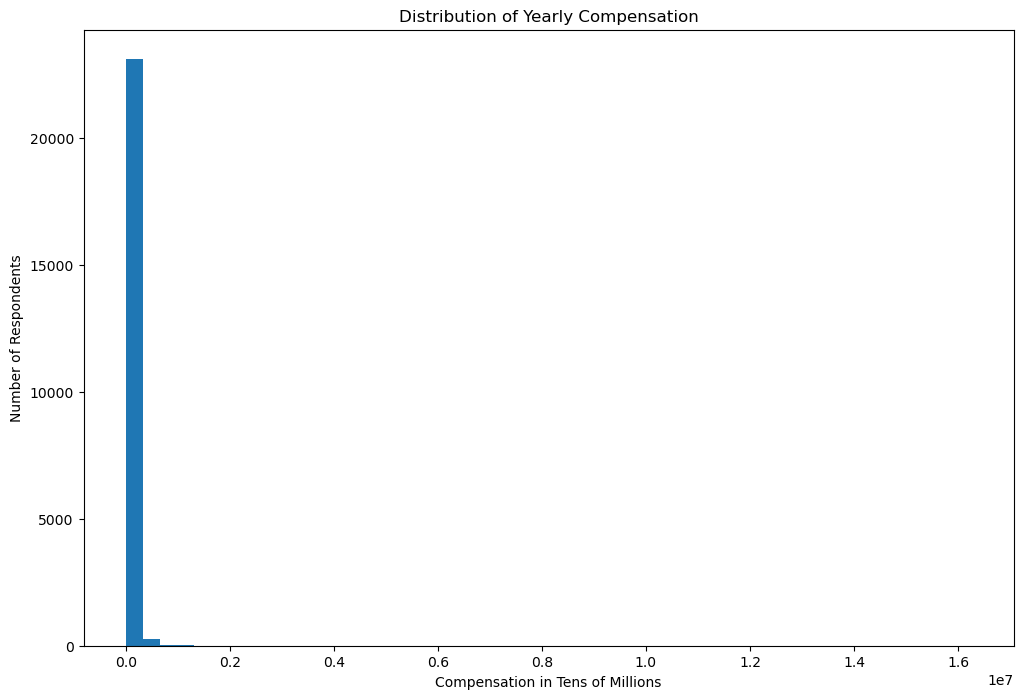

In [3]:
## Write your code here
plt.figure(figsize=(12, 8))
plt.hist(df['ConvertedCompYearly'], bins = 50)
plt.title('Distribution of Yearly Compensation')
plt.xlabel('Compensation in Tens of Millions')
plt.ylabel('Number of Respondents')
plt.show()

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [4]:
## Write your code here
df_fulltime = df[df['Employment'] == "Employed, full-time"]
print("The median salary for those who are employed full-time is", df_fulltime['ConvertedCompYearly'].median())

The median salary for those who are employed full-time is 69814.0


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



In [5]:
## Write your code here
df['Country'].value_counts() #top 3 countries are US, Germany, India

df_us = df[df['Country'] == "United States of America"]
df_ger = df[df['Country'] == "Germany"]
df_ind = df[df['Country'] == "India"]

print("The median salary in the US is", df_us['ConvertedCompYearly'].median())
print("The median salary in Germany is", df_ger['ConvertedCompYearly'].median())
print("The median salary in India is", df_ind['ConvertedCompYearly'].median())

The median salary in the US is 143000.0
The median salary in Germany is 73036.0
The median salary in India is 16749.0


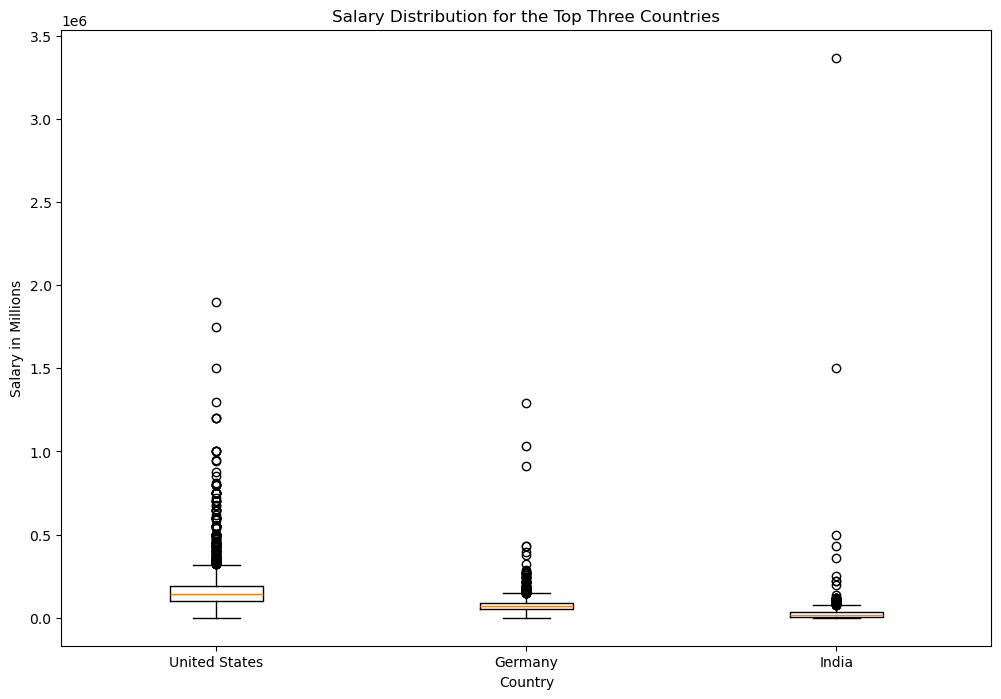

In [7]:
#I need to remove NaN values before I can make boxplots
df_us = df_us.dropna(subset = ['ConvertedCompYearly'])
df_ger = df_ger.dropna(subset = ['ConvertedCompYearly'])
df_ind = df_ind.dropna(subset = ['ConvertedCompYearly'])

plt.figure(figsize=(12,8))
plt.boxplot([df_us['ConvertedCompYearly'], df_ger['ConvertedCompYearly'], df_ind['ConvertedCompYearly']], tick_labels=['United States', 'Germany', 'India'])
plt.title('Salary Distribution for the Top Three Countries')
plt.xlabel('Country')
plt.ylabel('Salary in Millions')
plt.show()

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [8]:
## Write your code here
#define variables and determine how many outliers there are
iqr = df['ConvertedCompYearly'].quantile(0.75) - df['ConvertedCompYearly'].quantile(0.25)
upper_lim = df['ConvertedCompYearly'].quantile(0.75) + 1.5 * iqr
lower_lim = df['ConvertedCompYearly'].quantile(0.25) - 1.5 * iqr
outliers = df[(df['ConvertedCompYearly'] < lower_lim) | (df['ConvertedCompYearly'] > upper_lim)]
print("The number of outliers in the column ConvertedCompYearly is", len(outliers['ConvertedCompYearly']))

The number of outliers in the column ConvertedCompYearly is 978


In [9]:
#create new dataframe and remove the outliers
no_outliers = df.drop(outliers.index)
print("Length of the original dataframe:", len(df))
print("Length of the dataframe with outliers removed:", len(no_outliers))
#should probably drop null values too
no_outliers = no_outliers.dropna(subset = ['ConvertedCompYearly'])
print("Length of the dataframe with outliers and null values in ConvertedCompYearly removed:", len(no_outliers))

Length of the original dataframe: 65437
Length of the dataframe with outliers removed: 64459
Length of the dataframe with outliers and null values in ConvertedCompYearly removed: 22457


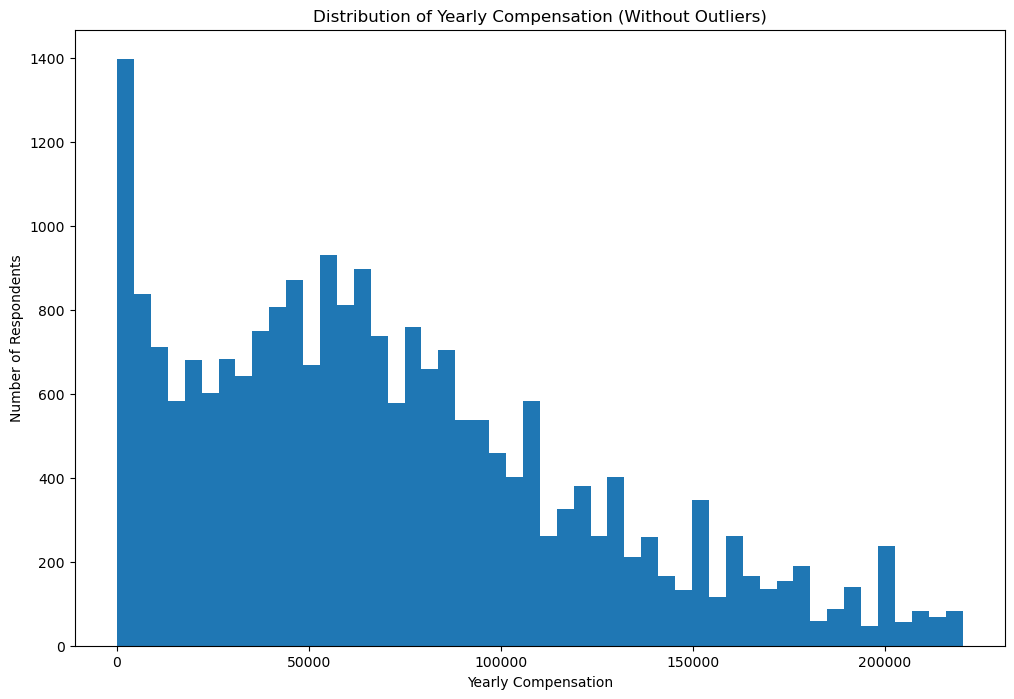

In [23]:
#since the data was so skewed, I'm going to remake the histogram and boxplots that I made earlier to not include outliers
plt.figure(figsize=(12, 8))
plt.hist(no_outliers['ConvertedCompYearly'], bins = 50)
plt.title('Distribution of Yearly Compensation (Without Outliers)')
plt.xlabel('Yearly Compensation')
plt.ylabel('Number of Respondents')
plt.show()

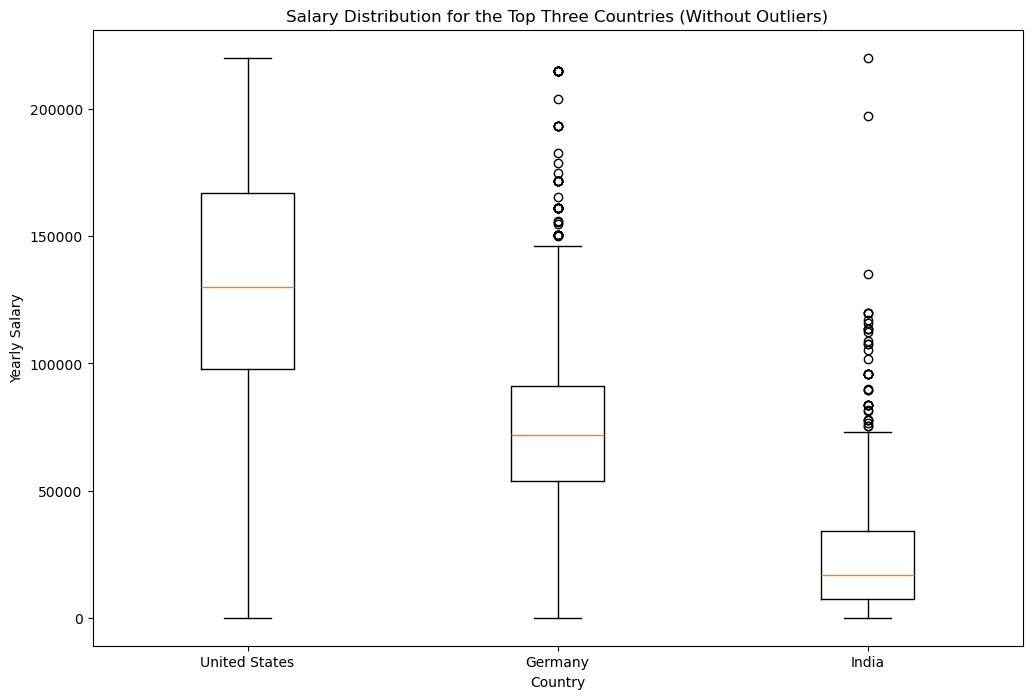

In [27]:
df_us_no = no_outliers[no_outliers['Country'] == "United States of America"]
df_ger_no = no_outliers[no_outliers['Country'] == "Germany"]
df_ind_no = no_outliers[no_outliers['Country'] == "India"]

plt.figure(figsize=(12,8))
plt.boxplot([df_us_no['ConvertedCompYearly'], df_ger_no['ConvertedCompYearly'], df_ind_no['ConvertedCompYearly']], tick_labels=['United States', 'Germany', 'India'])
plt.title('Salary Distribution for the Top Three Countries (Without Outliers)')
plt.xlabel('Country')
plt.ylabel('Yearly Salary')
plt.show()

<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


In [10]:
## Write your code here
three_col_corr = df[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].corr()
three_col_corr

,ConvertedCompYearly,WorkExp,JobSatPoints_1
ConvertedCompYearly,1.000000,0.154114,0.020306
WorkExp,0.154114,1.000000,-0.026490
JobSatPoints_1,0.020306,-0.026490,1.000000


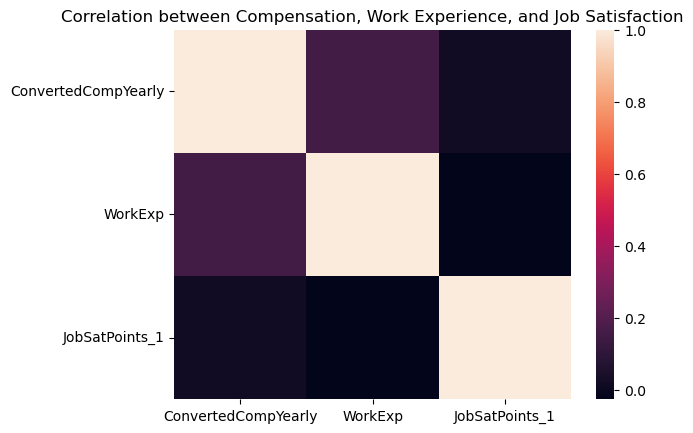

In [26]:
sns.heatmap(three_col_corr)
plt.title('Correlation between Compensation, Work Experience, and Job Satisfaction')
plt.yticks(rotation = 0)
plt.show()

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


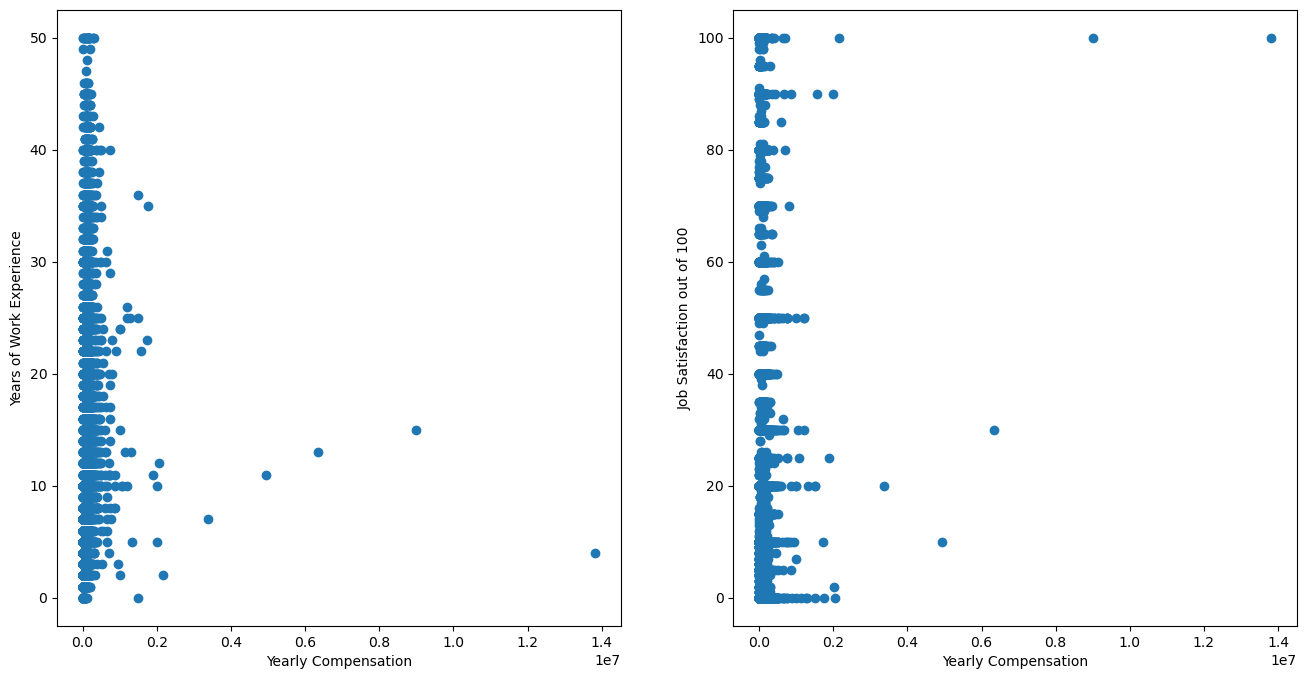

In [17]:
## Write your code here
plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1)
plt.scatter(df['ConvertedCompYearly'], df['WorkExp'])
plt.xlabel('Yearly Compensation')
plt.ylabel('Years of Work Experience')

plt.subplot(1, 2, 2)
plt.scatter(df['ConvertedCompYearly'], df['JobSatPoints_1'])
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction out of 100')

plt.show()

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
